In [144]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(rc={'figure.figsize':(12,8)})
sns.set(style='darkgrid', context='notebook', palette='deep')

Reading Data

In [145]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [146]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [147]:
train.shape

(1460, 81)

In [148]:
test.shape #SalesPrice column missing

(1459, 80)

In [149]:
train.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [150]:
test.isna().sum()


Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 80, dtype: int64

In [151]:
#creating a new column Set in both the Dataframes 
train['Set'] = "train"
test['Set'] = "test"
#creating new column SalesPrice in test 
test['SalePrice'] = -1

In [152]:
#combining two datasets 
df = train.append(test)
df.reset_index(inplace=True)
df.shape

(2919, 83)

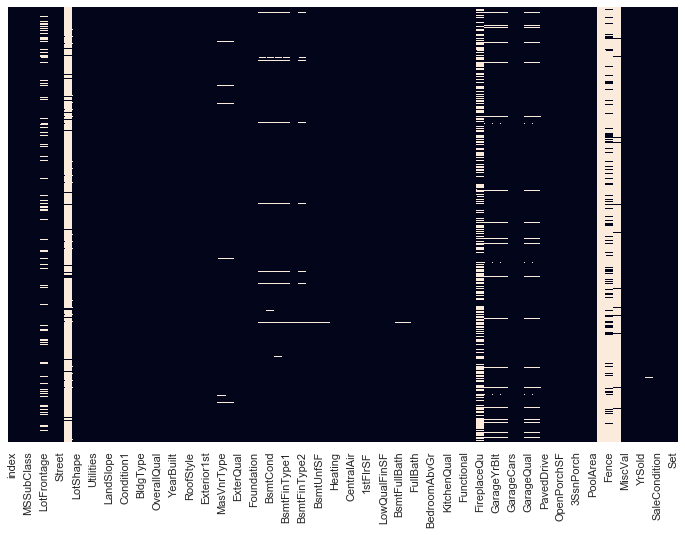

In [153]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

In [154]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 83 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          2919 non-null   int64  
 1   Id             2919 non-null   int64  
 2   MSSubClass     2919 non-null   int64  
 3   MSZoning       2915 non-null   object 
 4   LotFrontage    2433 non-null   float64
 5   LotArea        2919 non-null   int64  
 6   Street         2919 non-null   object 
 7   Alley          198 non-null    object 
 8   LotShape       2919 non-null   object 
 9   LandContour    2919 non-null   object 
 10  Utilities      2917 non-null   object 
 11  LotConfig      2919 non-null   object 
 12  LandSlope      2919 non-null   object 
 13  Neighborhood   2919 non-null   object 
 14  Condition1     2919 non-null   object 
 15  Condition2     2919 non-null   object 
 16  BldgType       2919 non-null   object 
 17  HouseStyle     2919 non-null   object 
 18  OverallQ

In [155]:
#drop the colomn have more null values
df.drop(['Alley','PoolQC','Fence','MiscFeature','GarageYrBlt'], axis='columns', inplace = True)
df.shape

(2919, 78)

In [156]:
df['MSZoning'].value_counts()

RL         2265
RM          460
FV          139
RH           26
C (all)      25
Name: MSZoning, dtype: int64

In [157]:
df['MSZoning'].fillna("RL", inplace = True)
df.Utilities.fillna('AllPub',inplace = True)
df.Exterior1st.fillna("VinylSd", inplace = True)
df.Exterior2nd.fillna("VinylSd", inplace = True)
df.MasVnrArea.fillna(0., inplace=True)
df.BsmtCond.fillna("No", inplace=True)
df.BsmtExposure.fillna("NB", inplace=True)
df.BsmtFinType1.fillna("NB", inplace=True)
df.BsmtFinType2.fillna("NB", inplace=True)
df.BsmtFinSF1.fillna(0., inplace=True)
df.BsmtFinSF2.fillna(0., inplace=True)
df.BsmtUnfSF.fillna(0., inplace=True)
df.TotalBsmtSF.fillna(0., inplace=True)
df.Electrical.fillna("SBrkr", inplace = True)
df.BsmtFullBath.fillna(0., inplace=True)
df.BsmtHalfBath.fillna(0., inplace=True)
df.KitchenQual.fillna("TA", inplace = True)
df.Functional.fillna('Typ', inplace = True)
df.FireplaceQu.fillna("No", inplace = True)
df.GarageType.fillna("No", inplace = True)
df.GarageFinish.fillna("No", inplace = True)
df.GarageCars.fillna(0, inplace = True)
df.GarageArea.fillna(0, inplace = True)
df.GarageQual.fillna("No", inplace = True)
df.GarageCond.fillna("No", inplace = True)
df.SaleType.fillna("Con", inplace = True)
df.SaleCondition.fillna("Normal", inplace = True)

In [158]:
df['LotFrontage'] = df.groupby(['Neighborhood', 'Street'])['LotFrontage'].transform(lambda x: x.fillna(x.median()))

In [159]:
df.BsmtFullBath.replace(3.0, 2.0, inplace=True)
df.BsmtFullBath = df.BsmtFullBath.astype('int')
df.BsmtHalfBath = df.BsmtHalfBath.astype('int')
df.KitchenAbvGr = pd.cut(df.KitchenAbvGr,2)
df.KitchenAbvGr = df.KitchenAbvGr.astype('category').cat.rename_categories([0, 1])
df.TotRmsAbvGrd = df.TotRmsAbvGrd.apply(lambda row: 4 if row < 5 else 10)
df.Fireplaces = df.Fireplaces.apply(lambda row: 2 if row >= 2 else row)
df.Fireplaces = df.Fireplaces.astype('int')
df.GarageCars = df.GarageCars.astype('int')
df['LotArea_log'] = np.log(df['LotArea'])
df['MasVnrType']=df['MasVnrType'].fillna(df['MasVnrType'].mode()[0])
df['BsmtQual']=df['BsmtQual'].fillna(df['BsmtQual'].mode()[0])

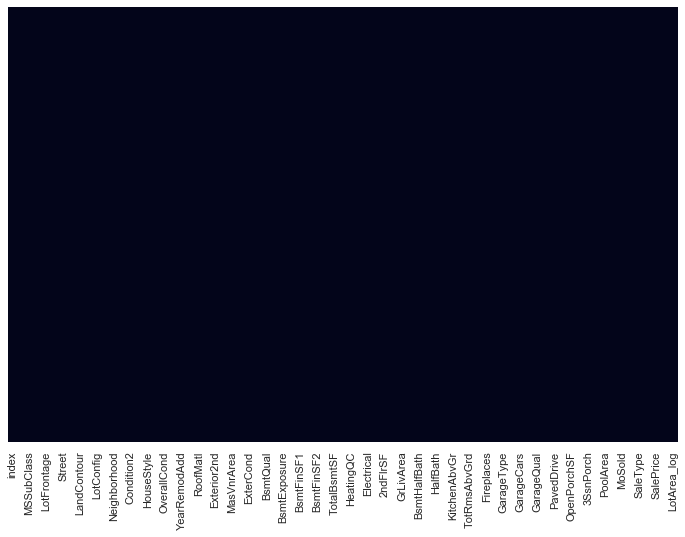

In [160]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

Handling Catogarical Features

In [161]:
columns = [ 'MSZoning','Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType','HouseStyle', 
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType','ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual','BsmtCond', 'BsmtExposure', 'BsmtFinType1', 
       'BsmtFinType2', 'Heating','HeatingQC', 'CentralAir', 'Electrical',
       'KitchenQual','Functional', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond','PavedDrive', 'SaleType',
       'SaleCondition']

In [162]:
len(columns)

39

In [163]:
def category_onehot_multicols(multcolumns):
    df_final = df
    i=0
    for fields in multcolumns:
        
        print(fields)
        df1=pd.get_dummies(df[fields],drop_first=True)
        df.drop([fields],axis=1,inplace=True)
        if i==0:
            df_final=df1.copy()
        else:
            
            df_final=pd.concat([df_final,df1],axis=1)
        i=i+1
       
        
    df_final=pd.concat([df,df_final],axis=1)
        
    return df_final

In [164]:
df_final = category_onehot_multicols(columns)

MSZoning
Street
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition1
Condition2
BldgType
HouseStyle
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
ExterQual
ExterCond
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
Heating
HeatingQC
CentralAir
Electrical
KitchenQual
Functional
FireplaceQu
GarageType
GarageFinish
GarageQual
GarageCond
PavedDrive
SaleType
SaleCondition


In [165]:
df_final.shape

(2919, 249)

In [166]:
df_final =df_final.loc[:,~df_final.columns.duplicated()]
df_final.shape

(2919, 181)

In [167]:
train = df_final[df_final.Set =='train']
test = df_final[df_final.Set == "test"]

In [168]:
train.shape

(1460, 181)

In [169]:
test.shape

(1459, 181)

In [170]:
x_train = train.drop(['SalePrice','Set'], axis='columns')
y_train = train.SalePrice

In [171]:
x_test = test.drop(['SalePrice','Set'], axis='columns')
y_test = train.SalePrice

In [172]:
x_train.head()

,index,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,...,ConLI,ConLw,New,Oth,WD,AdjLand,Alloca,Family,Normal,Partial
0,0,1,60,65.0,8450,7,5,2003,2003,196.0,...,0,0,0,0,1,0,0,0,1,0
1,1,2,20,80.0,9600,6,8,1976,1976,0.0,...,0,0,0,0,1,0,0,0,1,0
2,2,3,60,68.0,11250,7,5,2001,2002,162.0,...,0,0,0,0,1,0,0,0,1,0
3,3,4,70,60.0,9550,7,5,1915,1970,0.0,...,0,0,0,0,1,0,0,0,0,0
4,4,5,60,84.0,14260,8,5,2000,2000,350.0,...,0,0,0,0,1,0,0,0,1,0


In [173]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB
model = GaussianNB()

In [174]:
model.fit(x_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [175]:
import pickle
filename ="final_model.pkl"
pickle.dump(model,open(filename,'wb'))

In [176]:
y_test = model.predict(x_test)

In [177]:
prediction = pd.DataFrame(y_test)
prediction.tail()

,0
1454,80000
1455,80000
1456,142500
1457,139000
1458,219500


In [178]:
sub_df=pd.read_csv('submission.csv')
sub_df

,Id,SalePrice
0,1461,-1.463325e+11
1,1462,-1.463325e+11
2,1463,-1.463325e+11
3,1464,-1.463324e+11
4,1465,-1.463324e+11
...,...,...
1454,2915,-1.463326e+11
1455,2916,-1.463326e+11
1456,2917,-1.463325e+11
1457,2918,-1.463325e+11


In [179]:
datasets=pd.concat([sub_df['Id'],prediction],axis=1)
datasets.columns=['Id','SalePrice']
datasets.to_csv('submission.csv',index=False)